<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski <br>
        L. Neumann <br>
        M. Kißgen </p>
        <p><strong>2024-04-15</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table>
<div class="clearfix"></div>
<center>
    <h1>Datenbanken und Informationssysteme (SoSe 2024) </h1>
    <h1>Übung 1 - ER-Diagramme</h1>
</center>

<center>
    <h4>Abgabe bis 2024-04-22 12:15 Uhr</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook ins Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 22. April vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Dokumentations-Notebook</h3>
Wir empfehlen ihnen das zu dieser Übung zugehörige Dokumentations-Notebook zu lesen. Zusätzlich zur der Handhabung der verschiedenen verwendeten Tools werden dort zentrale Konzepte der Vorlesung noch einmal wiederholt. Sie finden das Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=39633">Moodle Lernraum</a>.

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Gruppenteilnehmer</h4>
<ul>
    <li>Florian Assmuth, 449348</li>
    <li>Elisona Agalliu, 430455</li>
    <li>Beren Kapanci, 424273</li>
    <li>Erik Fedrau, 433793</li>
    <li>Name, Matr. Nr.</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>

In [36]:
%pip install "dbis-er-diagram~=1.1" "dbis-exc-manager~=0.4.0"
try:
    # import libraries
    from erdiagram import ER
    from erdiagram import *
    from excmanager.Task import Exercise, Task, SubTask
    from IPython.display import display, HTML
    # initialize task structure
    exc = Exercise( 1 )
    task1 = Task( exc, "1.1" )
    task2 = Task( exc, "1.2" )
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2>Etwas ist beim import schief gelaufen:</h1>{e}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1>OK, es kann los gehen!</h1></div>"))

Note: you may need to restart the kernel to use updated packages.


<hr />

<div class="pull-left">

## Aufgabe 1.1 - ER-Diagramm in 1:n Notation

</div>

<div class="pull-right">

### (16 Punkte)

</div>

Folgende Anforderungen skizzieren ein Informationssystem zur Speicherung von Daten eines digitalen Musikladens.

Erstellen Sie ein ER-Diagramm, das die unten genannten Teilanforderungen darstellt.
Verwenden Sie für Kardinalitätsrestriktionen die **1 ∶ n-Notation**.

Beim Implementieren der Aufgabe sollten Sie sicherstellen, dass Sie die `NotImplementedError` Exception auskommentieren oder löschen.

<div class="pull-left">

## Teilaufgabe 1.1 a)

</div>

<div class="pull-right">

### (2 Punkte)

</div>

In diesem System gibt es eine Entität namens `Person`. Jede Person des Musikladens bekommt einen `Name`n sowie eine `Adresse` zugewiesen. Der Name besteht aus `Vorname` und `Nachname`. Ferner besteht die Adresse aus einer `Straße`, einer `Hausnummer` sowie einem `Ort`.

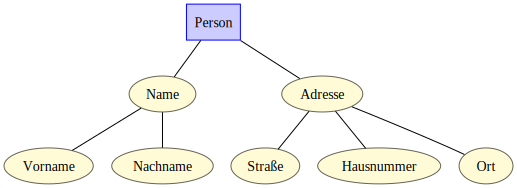

In [37]:
g = ER()

g.add_attribute("Person","Name",composed_of=["Vorname","Nachname"])
g.add_attribute("Person","Adresse",composed_of=["Straße","Hausnummer","Ort"])

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task1, "a", points = 2 )
g.display()
assert len(g.get_entities()) == 1, f"Es wird eine Entität erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 2, f"Es werden zwei Attribute erwartet. Ist: {len(g.get_attributes())}"

subtask.setSolution(g.as_solution())
subtask.setData(g)

In [38]:
# Autograder, bitte ignorieren.

<div class="pull-left">

## Teilaufgabe 1.1 b)

</div>

<div class="pull-right">

### (3 Punkte)

</div>

Eine Person kann ein `Angestellter`, ein `Kunde` oder ein `Musiker` sein, andere Möglichkeiten sind vorgesehen. Die Arten von Personen können sich überschneiden. Jedem Kunden des Musikladens wird eine eindeutige `KundenId` und mehrere `Telefonnummer`n zugewiesen. Einem Musiker wird eine eindeutige `MusikerId` zugewiesen. Ein Angestellter hat eine `Position` innerhalb des Ladens und kann durch eine eindeutige `AngestelltenId` identifiziert werden.

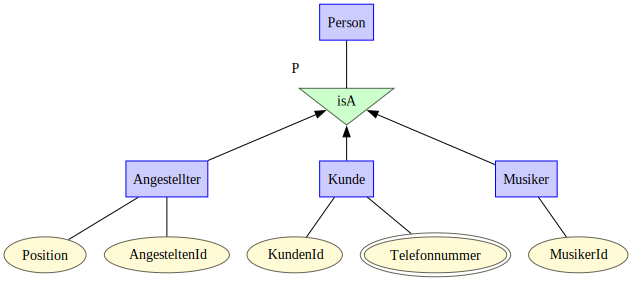

In [39]:
g = ER()

g.add_is_a("Person",["Angestellter","Kunde","Musiker"],is_total=False,is_disjunct=False)
g.add_attribute("Kunde","KundenId",is_pk=True)
g.add_attribute("Kunde","Telefonnummer",is_multiple=True)
g.add_attribute("Musiker","MusikerId",is_pk=True)
g.add_attribute("Angestellter","Position")
g.add_attribute("Angestellter","AngesteltenId",is_pk=True)

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task1, "b", points = 3 )
g.display()
assert len(g.get_entities()) == 4, f"Es werden vier Entitäten erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 5, f"Es werden fünf Attribute erwartet. Ist: {len(g.get_attributes())}"

subtask.setSolution(g.as_solution())
subtask.setData(g)

In [40]:
# Autograder, bitte ignorieren.

<div class="pull-left">

## Teilaufgabe 1.1 c)

</div>

<div class="pull-right">

### (3 Punkte)

</div>

Nun kommen noch `Track`s in einem `Album` und `Musiker` hinzu. 

Jedem Track wird eine eindeutige `TrackId` zugewiesen, außerdem besitzt jeder Track einen eindeutigen `Name`n. Jeder Track gehört zu genau einem Album und ein Album hat mehrere Tracks. Ein Album ist eindeutig über die `AlbumId` identifizierbar. Zudem besitzt jedes Album ein `Erscheinungsdatum` sowie einen `Titel`. Die Alben werden je genau von einem Musiker produziert, wobei Musiker mehrere Alben produzieren können.

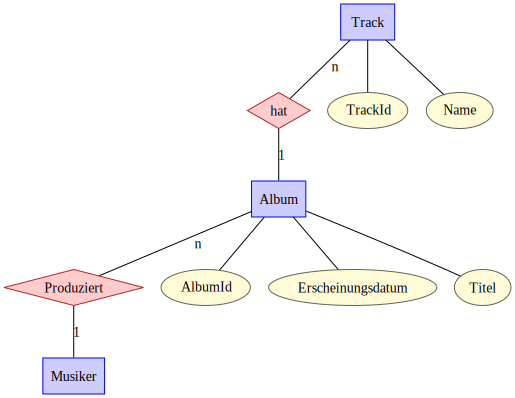

In [41]:
g = ER()

g.add_attribute("Track","TrackId",is_pk=True)
g.add_attribute("Track","Name",is_pk=True)
g.add_relation({"Track":"n"},"hat",{"Album":"1"})
g.add_attribute("Album","AlbumId",is_pk=True)
g.add_attribute("Album","Erscheinungsdatum")
g.add_attribute("Album","Titel")
g.add_relation({"Album":"n"},"Produziert",{"Musiker":"1"})

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task1, "c", points = 3 )
g.display()
assert len(g.get_entities()) == 3, f"Es werden drei Entitäten erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 5, f"Es werden fünf Attribute erwartet. Ist: {len(g.get_attributes())}"
assert len(g.get_relations()) == 2, f"Es werden zwei Relationen erwartet. Ist: {len(g.get_relations())}"

subtask.setSolution(g.as_solution())
subtask.setData(g)

In [42]:
# Autograder, bitte ignorieren.

<div class="pull-left">

## Teilaufgabe 1.1 d)

</div>

<div class="pull-right">

### (4 Punkte)

</div>

Mehrere Tracks werden in `Playlist`s organisiert, die einen `Name`n und eine eindeutige `PlaylistId` besitzen. Ein Track kann in mehreren Playlists zu finden sein. Jeder Track wird zudem genau einem `Genre` zugeordnet. Ein Genre wird eindeutig über eine `GenreId` identifiziert und hat einen `Namen`. Das Genre wird in die Arten `Pop`, `Hip-Hop` und `Rock` unterteilt, wobei diese Arten sich nicht überschneiden können. Des Weiteren sind mehr als die genannten Genres vorgesehen.

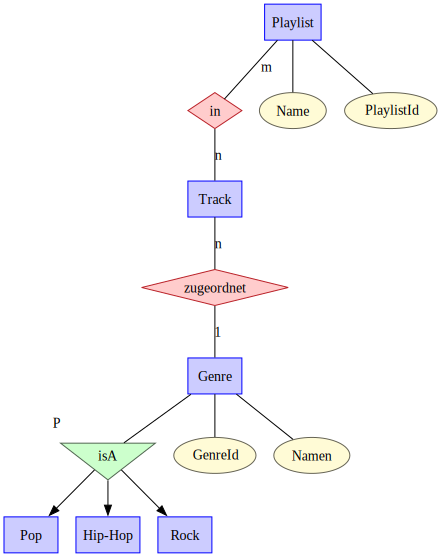

In [43]:
g = ER()

g.add_attribute("Playlist","Name")
g.add_attribute("Playlist","PlaylistId",is_pk=True)
g.add_relation({"Playlist":"m"},"in",{"Track":"n"})
g.add_relation({"Track":"n"},"zugeordnet",{"Genre":"1"})
g.add_attribute("Genre","GenreId",is_pk=True)
g.add_attribute("Genre","Namen")
g.add_is_a("Genre",["Pop","Hip-Hop","Rock"],is_total=False,is_disjunct=True)

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task1, "d", points = 4 )
g.display()
assert len(g.get_entities()) == 6, f"Es werden sechs Entitäten erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 4, f"Es werden vier Attribute erwartet. Ist: {len(g.get_attributes())}"
assert len(g.get_relations()) == 2, f"Es werden zwei Relation erwartet. Ist: {len(g.get_relations())}"


subtask.setSolution(g.as_solution())
subtask.setData(g)

In [44]:
# Autograder, bitte ignorieren.

<div class="pull-left">

## Teilaufgabe 1.1 e)

</div>

<div class="pull-right">

### (4 Punkte)

</div>

Das Geschäftsmodell des Musikladens sieht vor, dass Kunden die Tracks kaufen. Um diesen Geschäftsvorfall zu dokumentieren, wird in dem System die Entität `Rechnung` eingeführt. Der Rechnung wird eine eindeutige `RechnungsId`, ein `Rechnungsdatum` sowie eine totale `Rechnungssumme` zugeordnet. 

Jede Rechnung wird genau einem Kunden zugeordnet, ein Kunde hingegen kann mehrere Rechnungen zugeordnet sein. Da ein Kunde pro Rechnung mehrere Tracks gleichzeitig erwerben kann, wird die Rechnung in `Rechnungszeile`n unterteilt. Eine Rechnung wird in beliebig viele Rechnungszeilen unterteilt, hingegen gehört eine Rechnungszeile genau einer Rechnung an. Eine Rechnungszeile kann durch ihre `RechnungszeilenId` innerhalb einer Rechnung eindeutig identifiziert werden. Zusätzlich besitzt die Rechnungszeile eine `Menge` und ein `Preis pro Einheit`. In jeder Rechnungszeile wird der Verkauf von genau einem Track (in beliebiger Quantität) organisiert. Natürlich kann ein Track in mehreren Rechnungszeilen verkauft werden.   

**Vorsicht**: Wenn gesagt wird, dass eine Entität innerhalb einer anderen eindeutig identifiziert werden kann, überlegen Sie, was dies für die Existenz der abhängigen Entität bedeutet, insbesondere in diesem Kontext.

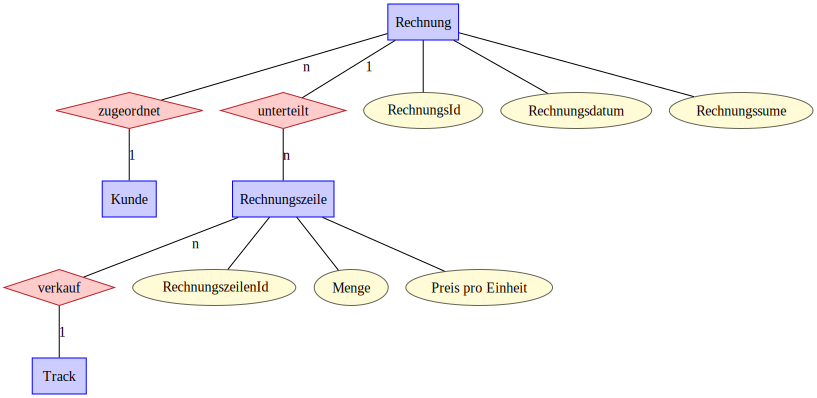

In [45]:
g = ER()

g.add_attribute("Rechnung","RechnungsId",is_pk=True)
g.add_attribute("Rechnung","Rechnungsdatum")
g.add_attribute("Rechnung","Rechnungssume")
g.add_relation({"Rechnung":"n"},"zugeordnet",{"Kunde":"1"})
g.add_relation({"Rechnung":"1"},"unterteilt",{"Rechnungszeile":"n"})
g.add_attribute("Rechnungszeile","RechnungszeilenId",is_pk=True)
g.add_attribute("Rechnungszeile","Menge")
g.add_attribute("Rechnungszeile","Preis pro Einheit")
g.add_relation({"Rechnungszeile":"n"},"verkauf",{"Track":"1"})

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task1, "e", points = 4 )
g.display()
assert len(g.get_entities()) == 4, f"Es werden vier Entitäten erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 6, f"Es werden sechs Attribute erwartet. Ist: {len(g.get_attributes())}"
assert len(g.get_relations()) == 3, f"Es werden drei Relationen erwartet. Ist: {len(g.get_relations())}"


subtask.setSolution(g.as_solution())
subtask.setData(g)

In [46]:
# Autograder, bitte ignorieren.

<div class="pull-left">

# Aufgabe 1.2 Relationen und Generalisierung/Spezialisierung

</div>

<div class="pull-right">

### (4 Punkte)

</div>

Folgende Abbildungen zeigen eine Relation und eine Vererbungsbeziehung im Kontext des Musikladens.

Beantworten Sie die jeweiligen Aufgaben, indem sie eine Menge an korrekten Antworten angeben, z.B. `{"a","b"}`.

Beim Implementieren der Aufgabe sollten Sie sicherstellen, dass Sie die `NotImplementedError` Exception auskommentieren oder löschen.

<div class="pull-left">

## Teilaufgabe 1.2 a)

</div>

<div class="pull-right">

### (2 Punkte)

</div>

Gegeben sei folgende Relation zwischen `Kunde`, `Angestellter` und `Genre` mit **min,max Notation**. Welche der untenstehenden Aussagen `a,b,c,d` sind wahr? Geben Sie die richtigen Antworten in Menge `result_relation` an. Richtige Antworten geben einen Punkt, Falsche ziehen einen Punkt ab (bis minimal 0 Punkte).

![Übung 1.1 c](assets/UB-1-1c-Relation.png "Title")

**a.** Maximal 6 Angestellte beraten beliebig viele Kunden zu genau einem Genre

**b.** Ein bestimmter Kunde kann nur von genau einem Angestellten zu einem Genre beraten werden

**c.** Insgesamt können Beliebig viele Angestellte Kunden beraten, beliebig viele Kunden beraten werden und beliebig viele Genres beraten werden

**d.** Zu einem bestimmten Genre können 5 Angestellte jeweils 5 Kunden beraten

In [47]:
# result_relation ist hier eine String-Menge, z.B. result = {'a','b'}. Füllen sie die Menge unter dem Kommentar mit Ihrer Lösung.
result_relation = {"d"}

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task2, "a", points = 2 )

for element in result_relation:
    assert isinstance(element, str), f"Die Menge darf nur aus Strings bestehen."
    assert element in ["a","b","c","d"], f"Die Menge darf nur die Antwortmöglichkeiten a,b,c,d enthalten."

subtask.setSolution(result_relation)
subtask.setData(result_relation)


In [48]:
# Autograder, bitte ignorieren

<div class="pull-left">

## Teilaufgabe 1.2 b)

</div>

<div class="pull-right">

### (2 Punkte)

</div>

Nun sei folgende Beziehung für den `Chef` eines Ladens gegeben: Ein `Chef` kann ein `Guter Chef` bzw. ein `Schlechter` Chef sein. Welche der untenstehenden Aussagen `a,b,c,d` sind wahr? Geben Sie die richtigen Antworten in Menge `result_is_a` an. Richtige Antworten geben einen Punkt, Falsche ziehen einen Punkt ab (bis minimal 0 Punkte).

![Übung 1.1 c](assets/UB-1-1c-isA.png "Title")

**a.** Auch ein schlechter Chef kann nett sein

**b.** Ein netter Chef kann nicht schlecht sein

**c.** Es gibt nur schlechte Chefs oder nur nette Chefs

**d.** Ein Chef kann auch nicht schlecht und nicht nett sein

In [49]:

# result_is_a ist hier eine String-Menge, z.B. result = {'a','b'}. Füllen sie die Menge unter dem Kommentar mit Ihrer Lösung.
result_is_a = {"a","d"}

### DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE!
subtask = SubTask( task2, "b", points = 2 )

for element in result_is_a:
    assert isinstance(element, str), f"Die Menge darf nur aus Strings bestehen."
    assert element in ["a","b","c","d"], f"Die Menge darf nur die Antwortmöglichkeiten a,b,c,d enthalten."

subtask.setSolution(result_is_a)
subtask.setData(result_is_a)

In [50]:
# Autograder, bitte ignorieren

# Zusammenfassung

Die Punktzahlangaben in dieser Codezelle dienen nur der Orientierung und geben die **maximal erreichbaren** Punkte an, nicht die tatsächlich erreichten.

In [51]:
from erdiagram import merge_er_diagrams
display(HTML(f"<h2>Sammle Ergebnisse:</h2>"))
points = 0
maxPoints = exc.getTaskByLabel('1.1').getPoints() + exc.getTaskByLabel('1.2').getPoints()
subtasks_1 = exc.getTaskByLabel('1.1').getSubtasks()
subtasks_2 = exc.getTaskByLabel('1.2').getSubtasks()

for i in subtasks_1:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe 1{subtasks_1[i].subtask}):</h4></div>"))
    try:
        subTaskGraph = subtasks_1[i].getData()
    except:
        display(HTML(f"<div class='alert alert-danger'> Teilaufgabe 1{subtasks_1[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Assertions. </div>"))
        continue
    else:
        points += subtasks_1[i].getPoints()
        display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks_1[i].getPoints()} Punkte) </div>"))

for i in subtasks_2:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe 2{subtasks_2[i].subtask}):</h4></div>"))
    try:
        subTaskGraph = subtasks_2[i].getData()
    except:
        display(HTML(f"<div class='alert alert-danger'> Teilaufgabe 2{subtasks_2[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Assertions. </div>"))
        continue
    else:
        points += subtasks_2[i].getPoints()
        display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks_2[i].getPoints()} Punkte) </div>"))

display(HTML("<hr />"))
display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/{maxPoints} Punkte gefunden.</h3></div>"))
